In [24]:
import pandas as pd
import networkx as nx
import json
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import pprint

In [25]:
df = pd.read_csv("https://raw.githubusercontent.com/umassdgithub/Week-8-part-1/main/data/data_scopus.csv")
## drop the rows with no Author Affiliations

df= df[~pd.isnull(df['Authors with affiliations'])].copy()

In [26]:
df.head()

,Title,Year,EID,Abstract,Publisher,Conference name,Conference date,Authors,Author(s) ID,Authors with affiliations,Source title,Abbreviated Source Title,Cited by
0,Virtual reality applications for the built env...,2020,2-s2.0-85086464158,With its advanced capabilities of immersive an...,Elsevier B.V.,NaN,NaN,"Zhang Y., Liu H., Kang S.-C., Al-Hussein M.",57202536919;53984550800;57215426514;6603541102;,"Zhang, Y., Department of Civil and Environment...",Automation in Construction,Autom Constr,NaN
1,"Self-tracking while doing sport: Comfort, moti...",2020,2-s2.0-85082875828,The spread of wearable technologies is paving ...,Academic Press,NaN,NaN,"Rapp A., Tirabeni L.",23398572100;57191836654;,"Rapp, A., Computer Science Department, Univers...",International Journal of Human Computer Studies,Int J Hum Comput Stud,NaN
2,"Bridge damage: Detection, IFC-based semantic e...",2020,2-s2.0-85078194587,Building Information Modeling (BIM) representa...,Elsevier B.V.,NaN,NaN,"Isailović D., Stojanovic V., Trapp M., Richter...",57205293410;56421700900;24831175200;3619515940...,"Isailović, D., Department for Construction Pro...",Automation in Construction,Autom Constr,NaN
3,VR system for spatio-temporal visualization of...,2019,2-s2.0-85075706132,Social media analysis is helpful to understand...,Springer,NaN,NaN,"Okada K., Yoshida M., Itoh T., Czauderna T., S...",57201502480;57171240600;35373203100;2592569550...,"Okada, K., Ochanomizu University, Tokyo, Japan...",Multimedia Tools and Applications,Multimedia Tools Appl,NaN
4,DiseaSE: A biomedical text analytics system fo...,2019,2-s2.0-85074886243,Due to increasing volume and unstructured natu...,Academic Press Inc.,NaN,NaN,"Abulaish M., Parwez M.A., Jahiruddin",6505934038;57202719622;35590173900;,"Abulaish, M., Department of Computer Science, ...",Journal of Biomedical Informatics,J. Biomed. Informatics,NaN


In [27]:
nodes = df['EID'].values


In [28]:
G = nx.Graph()

In [29]:
nodes = []
for row in df.iterrows():
  nodes.append((row[1]['EID'], {
      'Title': row[1]['Title'],
      'Year': row[1]['Year'],
      'Citations': row[1]['Cited by'],
      'Publisher': row[1]['Publisher']
  }))

In [30]:
nodes

[('2-s2.0-85086464158',
  {'Title': 'Virtual reality applications for the built environment: Research trends and opportunities',
   'Year': 2020,
   'Citations': nan,
   'Publisher': 'Elsevier B.V.'}),
 ('2-s2.0-85082875828',
  {'Title': 'Self-tracking while doing sport: Comfort, motivation, attention and lifestyle of athletes using personal informatics tools',
   'Year': 2020,
   'Citations': nan,
   'Publisher': 'Academic Press'}),
 ('2-s2.0-85078194587',
  {'Title': 'Bridge damage: Detection, IFC-based semantic enrichment and visualization',
   'Year': 2020,
   'Citations': nan,
   'Publisher': 'Elsevier B.V.'}),
 ('2-s2.0-85075706132',
  {'Title': 'VR system for spatio-temporal visualization of tweet data and support of map exploration',
   'Year': 2019,
   'Citations': nan,
   'Publisher': 'Springer'}),
 ('2-s2.0-85074886243',
  {'Title': 'DiseaSE: A biomedical text analytics system for disease symptom extraction and characterization',
   'Year': 2019,
   'Citations': nan,
   'Pub

In [31]:
G.add_nodes_from(nodes)

In [32]:
edges = []
for row in df.iterrows():
  current_paper = row[1]['EID']
  if ";" in row[1]['Author(s) ID']:
    authors = row[1]['Author(s) ID'][:-1].split(";")
    for author in authors:
      papers = df[df['Author(s) ID'].str.contains(author)]['EID'].values
      if len(papers) > 0:
          for paper in papers:
            if paper != current_paper:
              edges.append((current_paper, paper))
  else:
    continue

In [33]:
G.add_edges_from(edges)

In [34]:
pos = nx.drawing.circular_layout(G)

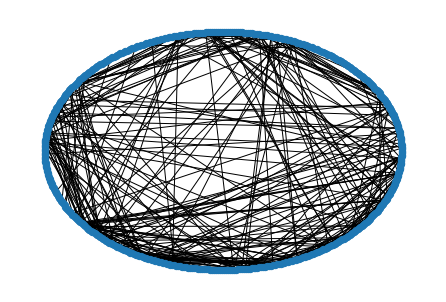

In [35]:
nx.draw(G, pos=pos, node_size=40)

In [36]:
from networkx.readwrite import json_graph

In [37]:
with open('publication_network.json', 'w') as f:
  json.dump(json_graph.node_link_data(G), f)